In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('ml-project')
jovian.set_colab_id('1b3mD2fkbNIt7NlpaSb1dHHpvNYNIpLOu')

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/gouravitandel1945/ml-project


'https://jovian.ai/gouravitandel1945/ml-project'

# **Predicting Walmart Weekly Sales using Machine Learning**

---



---



***Walmart Inc.*** is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. [Read more](https://en.wikipedia.org/wiki/Walmart)



![](https://i.imgur.com/KE5Mgce.jpg)
---



**About Data :**

The Dataset contains historical sales data for **45 Walmart** stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store from **Kaggle**.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. 

---


[**Kaggle**](https://www.kaggle.com/) allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.

---

**Purpose**
*  We are using this dataset to predict Weekly Sales of Wallmart by using various Machine Learning models.
*  Dataset contains many departments, and we must project the sales for each department in each store. To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.






## **How to Run the Code**

You can execute the code by using the "Run" button at the top of this page and selecting "Run on Colab". You can make changes and save your own version of the notebook to [Jovian](https://www.jovianai) by executing the following cells:

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian


In [ ]:
# Execute this to save new versions of the notebook
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/gouravitandel1945/ml-project


'https://jovian.ai/gouravitandel1945/ml-project'

## **Here’s a step by step outline of this project:**

1. Install the required libraries.
2. Download the data using `opendatasets` library from Kaggle.
3. Perform below actions on the Data.
*   View Dataset Files
*   Unzip files
*   Load Training set with Pandas 
*   Load Test set with Pandas
4. Perform EDA by analysing below columns to get meangingful insights out of it.
*    Date
*    Store
*    Dept
*    Type
5. Answer below questions to generate insights from the dataset.
*    What is the effect of Markdown on the sales?
*    What are the days with max sales?
6. Prepare Dataset for Training and Testing
7. Train & Evaluate Hardcoded Model
8. Train & Evaluate Baseline Model
9. Make Predictions and Submission
10. Feature Engineering
*   Extract part of date
*   Create a funtion `is_Holiday` to create column to check if its a Holiday Month (`Holiday_Month`)
*   Create column `Markdown_sum` to create the sum total of all MarkDown columns
*  Identifier Columns to Identify if a week is a SuperBowlWeek, LaborDay Week, ThanksGiving Week or Christmas Week
*   Handle null values in `MarkDown1`,`MarkDown2`,`MarkDown3`,`MarkDown4` and `MarkDown5` columns
11. Perform below actions on the data 
*   Scaling
*   Encode Categorical columns
12. Save Intermediate Results
13. Trains and Evaluate below models
14. Perform HyperParamter Tuning
15. Submit the result to Kaggle

## **Install library**

In this section, we will install all the required library to predict the Wallmart Weekly Sales

In [ ]:
!pip install opendatasets scikit-learn pandas xgboost jovian --quiet --upgrade


In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Download the dataset**

In this section, we will download the data using `opendatasets` library

`opendatasets` is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.



In [ ]:
import opendatasets as od

In [ ]:
download_url='https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data'

In [ ]:
od.download(download_url)


Skipping, found downloaded files in "./walmart-recruiting-store-sales-forecasting" (use force=True to force download)


On executing `od.download(download_url)`, you will have to add kaggle ID and key for your account.

You can get your ID and Key by following below steps:

1. Sign in to https://www.kaggle.com/
2. Go to Your Profile -> Account 
3. Under API, Click on *Create New API Token* 

![](https://imgur.com/hOyTM1U.jpg)

4. A text file will be downloaded, open the text file to get the user ID and key to Kaggle

After adding the ID and key, file will be donwloaded in the Folders section.

## **View dataset files**

In this section, we will view all the files that are downloaded in the dataset.

We we use `listdir` from `os` library.

In [ ]:
import os

In [ ]:
os.listdir('walmart-recruiting-store-sales-forecasting')

['train.csv.zip',
 'sampleSubmission.csv.zip',
 'stores.csv',
 'test.csv.zip',
 'features.csv.zip']

## **Unzip files**

In this section, we will unzip the files using `zipfile` and `extractall`

In [ ]:
directory='walmart-recruiting-store-sales-forecasting/'
from zipfile import ZipFile
zip=[directory+'train.csv.zip',directory+'test.csv.zip',directory+'sampleSubmission.csv.zip',directory+'features.csv.zip']
for i in zip:
  with ZipFile(i, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
train.csv                                      2014-02-03 13:46:20     12842546
Extracting all the files now...
Done!
File Name                                             Modified             Size
test.csv                                       2014-02-03 13:46:20      2598077
Extracting all the files now...
Done!
File Name                                             Modified             Size
sampleSubmission.csv                           2014-02-03 13:46:20      2146739
Extracting all the files now...
Done!
File Name                                             Modified             Size
features.csv                                   2014-02-03 13:46:20       592289
Extracting all the files now...
Done!


## **View Dataset Files**

In this section, we will view the details of the dataset.

In [ ]:
!wc -l train.csv

421571 train.csv


In [ ]:
!head test.csv

Store,Dept,Date,IsHoliday
1,1,2012-11-02,FALSE
1,1,2012-11-09,FALSE
1,1,2012-11-16,FALSE
1,1,2012-11-23,TRUE
1,1,2012-11-30,FALSE
1,1,2012-12-07,FALSE
1,1,2012-12-14,FALSE
1,1,2012-12-21,FALSE
1,1,2012-12-28,TRUE


In [ ]:
!head train.csv

Store,Dept,Date,Weekly_Sales,IsHoliday
1,1,2010-02-05,24924.5,FALSE
1,1,2010-02-12,46039.49,TRUE
1,1,2010-02-19,41595.55,FALSE
1,1,2010-02-26,19403.54,FALSE
1,1,2010-03-05,21827.9,FALSE
1,1,2010-03-12,21043.39,FALSE
1,1,2010-03-19,22136.64,FALSE
1,1,2010-03-26,26229.21,FALSE
1,1,2010-04-02,57258.43,FALSE


In [ ]:
!head sampleSubmission.csv

Id,Weekly_Sales
1_1_2012-11-02,0
1_1_2012-11-09,0
1_1_2012-11-16,0
1_1_2012-11-23,0
1_1_2012-11-30,0
1_1_2012-12-07,0
1_1_2012-12-14,0
1_1_2012-12-21,0
1_1_2012-12-28,0


## **Load Training set with Pandas**

In this section, we will load all the .csv files and covert it into DataFrame using `.read_csv()`

In [ ]:
import pandas as pd

In [ ]:
stores_df=pd.read_csv(directory+'/stores.csv')
features_df=pd.read_csv('features.csv')
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


## **Training Dataset**

Here, we will join the stores_df and features_df on the basis of Store number.

In [ ]:
Combined_data=pd.merge(features_df,stores_df,on='Store' )

Now we will combine the above store details with the training dataset.

In [ ]:
data_train_df=train_df.merge(Combined_data, how='left',on=['Store' , 'Date'] )
data_train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


In [ ]:
data_train_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


**Observations:**

*  There are few records where the Weekly Sales are presented in negative values.
*  The maxinum temperature has gone upto 100.140 which is quite extreme.
*  MarkDown5 has the maximum value offered among all the other MarkDowns 
 



## **Test data**

In this section, we will prepared the Test Dataset.

In [ ]:
Data_test_df=test_df.merge(Combined_data,how='left', on =['Store' , 'Date'])

In [ ]:
Data_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday_x   115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     114915 non-null  float64
 7   MarkDown2     86437 non-null   float64
 8   MarkDown3     105235 non-null  float64
 9   MarkDown4     102176 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           76902 non-null   float64
 12  Unemployment  76902 non-null   float64
 13  IsHoliday_y   115064 non-null  bool   
 14  Type          115064 non-null  object 
 15  Size          115064 non-null  int64  
dtypes: bool(2), float64(9), int64(3), object(2)
memory usage: 13.4+ MB


In [ ]:
Data_test_df.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000,115064.000000
mean,22.238207,44.339524,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733,136497.688921
std,12.809930,30.656410,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427,61106.926438
min,1.000000,1.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000,34875.000000
25%,11.000000,18.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000,93638.000000
50%,22.000000,37.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000,140167.000000
75%,33.000000,74.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000,202505.000000
max,45.000000,99.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,219622.000000


In [ ]:
Data_test_df['Date'].min(),Data_test_df['Date'].max()

('2012-11-02', '2013-07-26')

In [ ]:
data_train_df['Date'].min(),data_train_df['Date'].max()

('2010-02-05', '2012-10-26')

**Observations:**

* Training Dataset has data from 5th Feb 2010 to 26th Oct 2012
* Test Dataset has data from 2nd Nov 2012 to 26th Jul 2013

## **Exploratory Data Analysis**

In this section, we will perform EDA by :


1.   Analysing below columns to get meangingful insights out of it.
*    Date
*    Store
*    Dept
*    Type
2.   Answer below questions to generate insights from the dataset.
*    What is the effect of Markdown on the sales?
*    What are the days with max sales?

### **Date**

In [ ]:
data_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

Here, we will analyse Month Wise Distribution of Sale using the `Date` field.

We will convert the datatype of `Date` field to Datetime and extract Month

In [ ]:
data_train_df['Date']=pd.to_datetime(data_train_df['Date'])
data_train_df['Month'] = data_train_df.Date.dt.month

`reset_index()` is used to add the index column created by `groupby` into a pandas column

In [ ]:
date_df=data_train_df.groupby('Month').sum().reset_index()

In [ ]:
date_df

,Month,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Size
0,1,521937,1039038,3.325984e+08,0,870223.47,76367.351,3.682163e+07,1.112372e+08,9.992948e+05,6.882204e+06,4.326050e+07,4.029965e+06,185014.150,0,3219984603
1,2,786209,1573438,5.687279e+08,8895,1358254.43,111372.346,2.108105e+08,6.519521e+07,7.403472e+05,1.477809e+08,7.233209e+07,6.050472e+06,287621.161,8895,4865006193
2,3,852548,1698192,5.927859e+08,0,1894945.71,131072.731,1.271615e+08,7.609068e+06,1.390271e+05,5.579204e+07,4.974710e+07,6.578496e+06,309622.494,0,5257312710
3,4,917150,1823191,6.468598e+08,0,2359336.47,144990.329,6.510115e+07,2.327375e+07,3.043138e+05,1.408803e+07,4.210507e+07,7.056174e+06,331696.064,0,5653647559
4,5,784491,1564694,5.571256e+08,0,2294049.56,126442.259,1.026039e+08,2.051020e+05,1.848232e+06,2.505654e+07,3.885003e+07,6.044468e+06,281903.009,0,4831206158
5,6,847751,1693038,6.226299e+08,0,2850174.48,130593.501,9.365420e+07,2.871815e+06,7.051402e+05,2.352558e+07,7.440216e+07,6.540068e+06,302720.364,0,5214425748
6,7,911769,1818903,6.500010e+08,0,3252072.01,135750.638,5.930780e+07,1.536003e+06,3.145163e+05,3.864670e+07,6.854730e+07,7.009632e+06,325136.892,0,5601287100
7,8,849330,1694546,6.130902e+08,0,3008396.30,130432.408,1.634400e+08,1.135779e+06,5.778444e+05,8.066786e+07,5.505256e+07,6.559005e+06,299025.787,0,5219754709
8,9,851964,1692532,5.787612e+08,8861,2756289.57,131732.167,8.442547e+07,3.224239e+05,4.399078e+05,1.878868e+07,6.038453e+07,6.588184e+06,302755.403,8861,5242060031
9,10,851387,1695101,5.847848e+08,0,2340535.27,128600.595,4.111553e+07,2.035002e+05,3.429935e+05,1.316182e+07,4.289315e+07,6.598040e+06,297892.914,0,5236087743


In [ ]:
fig=px.bar(date_df,x='Month',y='Weekly_Sales',color='IsHoliday_x', title='Monthly Sales Distribution')

fig.show()

From the above bar graph, we can see that :
*  the Sales are maximum in the month of April, July, September , October which are not Holiday Months.

*  We can also see that good Sales happen in the month of Feb, Sep , Decemeber which are Holiday Month.
*  Least Sales takes place in the month of January which is quite expected as it falls just after the Holiday Month December.


### **Store**

Here, we will analyse Sales Distribution on the basis of Store Field

We will use `groupby` function to get the sum of Weekly Sales

In [ ]:
holiday_yes=data_train_df[data_train_df['IsHoliday_y']==True]
holiday_no=data_train_df[data_train_df['IsHoliday_y']==False]
sales_sum_yes=holiday_yes.groupby(['Store'])['Weekly_Sales'].aggregate('sum')
sales_sum_no=holiday_no.groupby(['Store'])['Weekly_Sales'].aggregate('sum')
store_sales=pd.merge(sales_sum_yes,sales_sum_no, on='Store')
store_sales.sort_values(by=['Weekly_Sales_x','Weekly_Sales_y'],ascending=False).head(10)


,Weekly_Sales_x,Weekly_Sales_y
Store,,
20,22490350.81,2.789074e+08
4,22431026.24,2.771129e+08
14,21205829.98,2.677941e+08
10,21137559.49,2.504802e+08
13,21130438.06,2.653873e+08
2,20792669.00,2.545898e+08
27,18922992.78,2.349329e+08
6,16809079.27,2.069471e+08
1,16657476.56,2.057453e+08


From the above table, we can see that Store 20 contributes to the maximum Sale as a Holiday Week with the sum amount of $ 2,24,90,350.81

### **Dept**

In [ ]:
len(data_train_df['Dept'].unique()),data_train_df['Dept'].unique().min(),data_train_df['Dept'].unique().max()

(81, 1, 99)

There are a total of 81 Store Departments in the range of 1 to 99

In [ ]:
fig=px.scatter(data_train_df,x='Dept',y='Weekly_Sales', color='IsHoliday_x')
fig.show()

From the above Scatter plot, we can see that:
Dept 75 has the maximum sales 

### **Correlation Matrix**

Here, we will create a Correlation Matrix to identify the correlation between various fields.

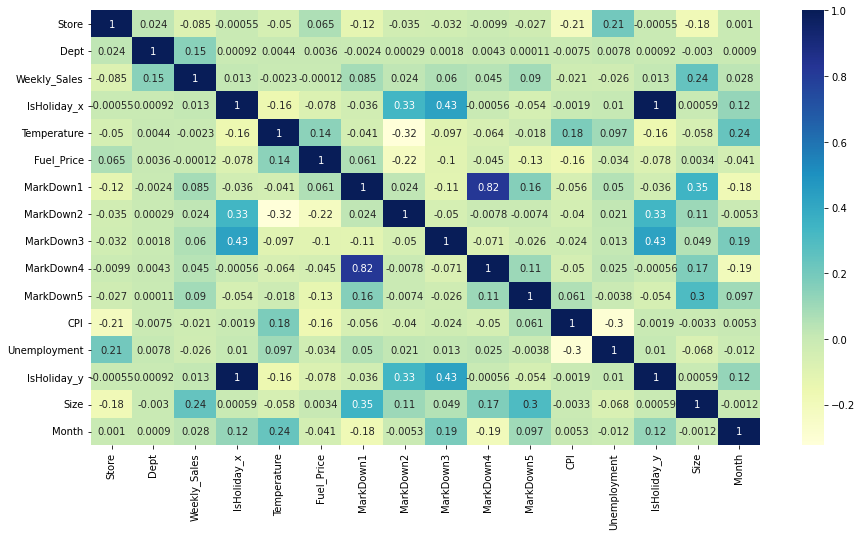

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
sns.heatmap(data_train_df.corr(),cmap="YlGnBu", annot=True)

From the above plot we can see that:
*  Dept and IsHoliday flag has maximum dependency on the Weekly Sales values
*  MarkDown1 and MarkDown5 has some impact on the Weekly Sales
*  Fuel Price, Temperature and CPI has the least correlation with the Weekly Sales hence they can be dropped off from the Dataset for now.

### **Type**

Here, we will perform analysis on Sales distribution on Type of Store

In [ ]:
fig=px.pie(data_train_df,names='Type', title='Type Wise Distribution of Weekly Sales', values='Weekly_Sales')
fig.show()

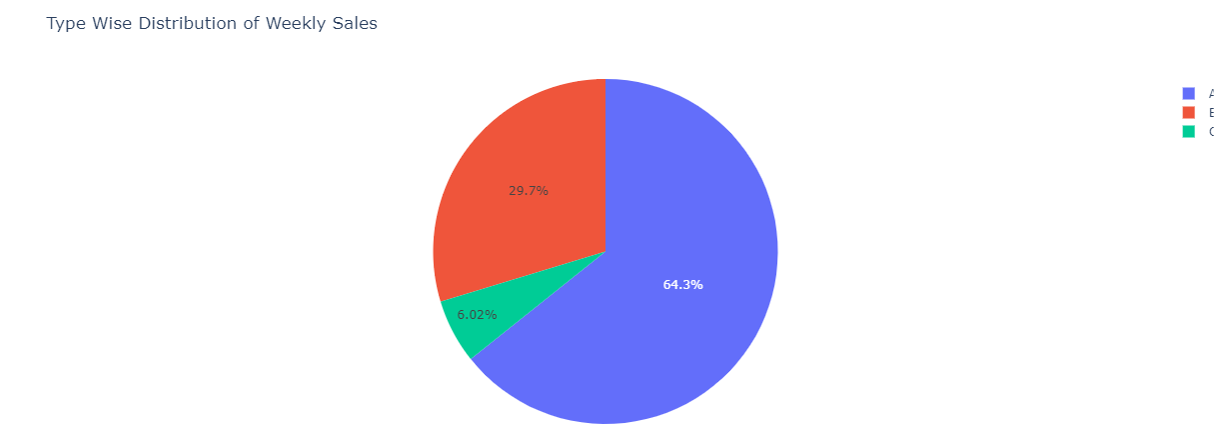

From the above graph we can see that:
*  Store Type A accounts to maximum of 64.3% of overall sales.
*  Store Type c accounts to minimum of 6.02% of overall sales
 

### **What is the effect of markdown on the sales?**

Here, we will answer above question by:
*  Filtering the data having null values for MarkDown5 field
*  Perform `groupby` on `MarkDown5` and then sum on `Weekly_Sales`

In [ ]:
from IPython.core.display import Markdown
MarkDown5_null=data_train_df[(data_train_df['MarkDown5']).isna()==True ].groupby('Store').sum('Weekly_Sales').reset_index()
MarkDown5_not_null=data_train_df[(data_train_df['MarkDown5']).isna()==False ].groupby('Store').sum('Weekly_Sales').reset_index()
Markdown_df=pd.merge(MarkDown5_null,MarkDown5_not_null, on='Store')
Markdown_df=Markdown_df.rename(columns={'Weekly_Sales_x':'Weekly_Sales_without_MarkDown','Weekly_Sales_y':'Weekly_Sales_with_MarkDown'})

In [ ]:
MarkDown5_null[MarkDown5_null['Store']==1]

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Size,Month
0,1,291382,1.400004e+08,431,453346.0,20196.838,0.0,0.0,0.0,0.0,0.0,1.403722e+06,51615.424,431,996711905,42384


In [ ]:
fig=px.bar(Markdown_df,x='Store',y=['Weekly_Sales_without_MarkDown','Weekly_Sales_with_MarkDown'],barmode='group', title='Effect of MarkDown5 on Sales')
fig.show()

From the above chart, we can see that the sales are high without Markdown values which makes sense as the Markdown values are reduced price. 
Hence its likely to have lower sales for weeks when Markdown is applied.


### **What are the days with max sales?**

Here, we will answer above question by:
*  Generating Month Number from `Date` field.
*  Perform `groupby` on `Day` and then sum on `Weekly_Sales`

In [ ]:
from datetime import datetime
data_train_df['Day']=data_train_df['Date'].dt.day
day_df=data_train_df.groupby('Day').sum('Weekly_Sales').reset_index()
fig=px.bar(day_df, x='Day',y='Weekly_Sales', color='Temperature', title='Days with Maximum Sales')
fig.show()

From the above graph, we can see that Sales are maximum on 24th and 25th of month and least on the last day of the month.

## **Prepare Dataset for Testing**

Here, we will prepare Dataset by performing below actions:

*   Split the Datatset
*   Fill/Remove Missing values
*   Extract input and output columns

### **Split the Dataset**

Since it is a time series data, we have sorted the data on the basis of date and will be pick first 80% of the data for testing and rest 20% for validation

In [ ]:
data_train_df=data_train_df.sort_values(by=['Date'])

In [ ]:
test_size = 84314

train_df = data_train_df[:-test_size]
val_df = data_train_df[-test_size:]

In [ ]:
len(train_df),len(val_df)

(337256, 84314)

### **Missing values**

For now, we are going to drop all the missing values to train a basic model that calculates the mean of the given data.

In [ ]:
train_df=train_df.dropna()
val_df=val_df.dropna()
#test_input=test_input.dropna()

### **Extract Input Output Columns**

Here, we will group the columns for Input and Output Dataset.

In [ ]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [ ]:
input_cols=['Store', 'Dept', 'Temperature','IsHoliday_x',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size']


In [ ]:
target_cols='Weekly_Sales'

## **Training Dataset**

In [ ]:
train_inputs=train_df[input_cols]
train_target=train_df[target_cols]

In [ ]:
train_inputs

,Store,Dept,Temperature,IsHoliday_x,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
73260,8,33,50.56,False,3.297,4971.01,4538.18,541.05,1407.72,3846.73,221.459513,6.123,155078
64244,7,41,19.53,False,3.505,3307.60,1431.65,143.06,1330.31,1680.90,195.637694,8.513,70713
294797,31,8,59.80,False,3.297,25879.08,8716.86,163.33,3983.24,7898.07,217.645539,7.441,203750
390394,41,94,32.87,False,3.505,17118.58,14927.30,309.49,8187.22,4925.08,195.637694,6.759,196321
17120,2,56,59.33,False,3.297,10797.64,20445.00,443.32,4754.07,4787.16,217.645539,7.441,202307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225058,23,81,41.81,False,4.025,4460.90,4852.66,25.17,2064.48,1879.86,137.868000,4.125,114533
224915,23,80,41.81,False,4.025,4460.90,4852.66,25.17,2064.48,1879.86,137.868000,4.125,114533
112848,12,36,64.28,False,4.254,9681.11,2934.51,14.08,1944.35,3103.61,131.108000,11.627,112238
157434,16,98,45.83,False,3.901,3532.73,1368.42,22.00,214.95,1983.50,197.780931,6.169,57197


In [ ]:
val_inputs=val_df[input_cols]
val_target=val_df[target_cols]

## **Test Dataset**

In [ ]:
test_input=Data_test_df[input_cols]

In [ ]:
len(test_input)

115064

## **Train & Evaluate Hardcoded Model**

Let's create a Simple model to calculate and predict Mean of the given data.

In [ ]:
import numpy as np

In [ ]:
class MeanRegressors:
  def fit(self,inputs, targets):
    self.mean =np.mean(targets)
  
  def predict(self, inputs):
    return np.full(inputs.shape[0] , self.mean)

In [ ]:
mean_model=MeanRegressors()

Let's fit the model using `.fit()`

In [ ]:
mean_model.fit(train_inputs,train_target)

In [ ]:
mean_model.mean

18255.87402441657

After the model is fitted, we will now predict the data by passing val_input dataset to the model using `.predict()`

In [ ]:
train_preds=mean_model.predict(train_inputs)
val_preds=mean_model.predict(val_inputs)


**Calculation of Evaluation Metric**

![](https://i.imgur.com/yt4MP5k.jpg)

We will create a function `weight` to calculate the weight w for a given dataset.

In [ ]:
def weight(df):
  if df['IsHoliday_x']==True:
    weight=5
  else:
    weight=1
  return weight 

Now, we will calculate the Weighted Mean Absolute Error using function `WMAE`

In [ ]:
def WMAE(dataset, real, predicted,weights):
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

We will call the function `weight` and `WMAE` for the train dataset and validation dataset.

In [ ]:
WT=train_inputs.apply(weight, axis=1)
WV=val_inputs.apply(weight, axis=1)

In [ ]:
WMAE(train_inputs,train_target,train_preds,WT),WMAE(val_inputs,val_target,val_preds,WV)

(17345.16, 16417.37)

**Observation**
*  The Weighted Mean Absolute Error for `MeanRegressor`Model predicts `$` 17,345 for  rain data and `$` 16,417 for Test Data.
*  The error for our next models should be less then the above score.


## **Train & Evaluate Baseline Model**

Now, we will train `LinearRegression` Model using **train_inputs** and **val_inputs**.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model=LinearRegression()

In [ ]:
linear_model.fit(train_inputs,train_target)

LinearRegression()

In [ ]:
train_preds=linear_model.predict(train_inputs)
val_preds=linear_model.predict(val_inputs)
train_preds

array([18375.86849582,  8280.49433775, 17660.99703906, ...,
       13506.85973967, 12985.49428038,  6745.81505972])

No we will call `weight` and `WMAE` function to calculate the WMAE Value.

In [ ]:
WT=train_inputs.apply(weight, axis=1)
WV=val_inputs.apply(weight, axis=1)

In [ ]:
WMAE(train_inputs,train_target,train_preds,WT),WMAE(val_inputs,val_target,val_preds,WV)

(16934.83, 16390.91)

**Observation**
* Data predicted from `LinearRegressor`model gives an error of `$` 16,934 on training data set and `$`16,390 on Validation set.

## **Make Predictions and Submission**

We will create Resuable function called `predict_and_submit` to predict and create a .csv file for submission to the Kaggle

In [ ]:
def predict_and_submit(model_name, test_input,fname):
  test_preds=model_name.predict(test_input)
  subsmission_df=pd.read_csv('sampleSubmission.csv')
  subsmission_df['Weekly_Sales']=test_preds
  subsmission_df.to_csv(fname,index=None)
  return subsmission_df


We will fill the NA values in the Test Dataset with 0 before using the Dataset.

In [ ]:
test_input=test_input.fillna(0)

In [ ]:
def predict_and_submit(model_name, test_input,fname):
  test_preds=model_name.predict(test_input)
  subsmission_df=pd.read_csv('sampleSubmission.csv')
  subsmission_df['Weekly_Sales']=test_preds
  subsmission_df.to_csv(fname,index=None)
  return subsmission_df

In [ ]:
predict_and_submit(linear_model,test_input,"Linear_model_regression.csv")

,Id,Weekly_Sales
0,1_1_2012-11-02,15151.494602
1,1_1_2012-11-09,16105.111024
2,1_1_2012-11-16,15973.235700
3,1_1_2012-11-23,23568.488250
4,1_1_2012-11-30,16437.159076
...,...,...
115059,45_98_2013-06-28,27173.820271
115060,45_98_2013-07-05,27174.421882
115061,45_98_2013-07-12,27400.803752
115062,45_98_2013-07-19,27189.251043


**Experiment tracking sheet:**

* We have created an experiment trackinng sheet to track the WMAE score for various Models and its Parameter.
https://docs.google.com/spreadsheets/d/104ScbQ_Ul0laAu91oRieRODW5Cbnuu-17fvggyjwx_c/edit#gid=294510864

# **Feature Engineering**

Feature Engineering is a technique that leverages data to create new variables that aren't in the training set.

Here, we will perform below actions

*   Extract part of date (day number, day of week , month number, Year and Week)
*   Create a funtion `is_Holiday` to create column to check if its a Holiday Month (`Holiday_Month`)
*   Create column `Markdown_sum` to create the sum total of all MarkDown columns
*  Identifier Columns to Identify if a week is a SuperBowlWeek, LaborDay Week, ThanksGiving Week or Christmas Week
*   Handle null values in `MarkDown1`,`MarkDown2`,`MarkDown3`,`MarkDown4` and `MarkDown5` columns



In [ ]:
data_train_df=train_df.merge(Combined_data, how='left',on=['Store' , 'Date'] )
Data_test_df=test_df.merge(Combined_data,how='left', on =['Store' , 'Date'])

In [ ]:
data_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [ ]:
columns=['Store', 'Dept', 'Date', 'IsHoliday_x', 'Temperature','Weekly_Sales',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size']
columns_test=['Store', 'Dept', 'Date', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size']
data_train_df=data_train_df[columns]
Data_test_df=Data_test_df[columns_test]


Note: All the dates are on friday

We will create a function to get day number, day of week , month number, Year and Week from the given date

In [ ]:
def get_date_part(df,col):
  df['WeekDay_no']=df[col].dt.weekday
  df['Month']=df[col].dt.month
  df['Day_no']=df[col].dt.day
  df['Year']=df[col].dt.year
  df['Week']=df[col].dt.week
  return df

We will call the `get_date_part` function now.

In [ ]:
data_train_df['Date']=pd.to_datetime(data_train_df['Date'])
get_date_part(data_train_df,'Date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Store,Dept,Date,IsHoliday_x,Temperature,Weekly_Sales,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Type,Size,WeekDay_no,Month,Day_no,Year,Week
0,1,1,2010-02-05,False,42.31,24924.50,2.572,NaN,NaN,NaN,...,211.096358,8.106,False,A,151315,4,2,5,2010,5
277665,29,5,2010-02-05,False,24.36,15552.08,2.788,NaN,NaN,NaN,...,131.527903,10.064,False,B,93638,4,2,5,2010,5
277808,29,6,2010-02-05,False,24.36,3200.22,2.788,NaN,NaN,NaN,...,131.527903,10.064,False,B,93638,4,2,5,2010,5
277951,29,7,2010-02-05,False,24.36,10820.05,2.788,NaN,NaN,NaN,...,131.527903,10.064,False,B,93638,4,2,5,2010,5
278094,29,8,2010-02-05,False,24.36,20055.64,2.788,NaN,NaN,NaN,...,131.527903,10.064,False,B,93638,4,2,5,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379648,40,87,2012-10-26,False,49.65,24638.96,3.917,3605.71,55.98,0.28,...,138.728161,4.145,False,A,155083,4,10,26,2012,43
181170,19,30,2012-10-26,False,56.49,3740.12,4.071,5430.75,90.07,NaN,...,138.728161,7.992,False,A,203819,4,10,26,2012,43
181313,19,31,2012-10-26,False,56.49,3128.17,4.071,5430.75,90.07,NaN,...,138.728161,7.992,False,A,203819,4,10,26,2012,43
181599,19,33,2012-10-26,False,56.49,5740.14,4.071,5430.75,90.07,NaN,...,138.728161,7.992,False,A,203819,4,10,26,2012,43


In [ ]:

Data_test_df['Date']=pd.to_datetime(Data_test_df['Date'])
get_date_part(Data_test_df,'Date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,IsHoliday_y,Type,Size,WeekDay_no,Month,Day_no,Year,Week
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,223.462779,6.573,False,A,151315,4,11,2,2012,44
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,...,223.481307,6.573,False,A,151315,4,11,9,2012,45
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,...,223.512911,6.573,False,A,151315,4,11,16,2012,46
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,...,223.561947,6.573,True,A,151315,4,11,23,2012,47
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,...,223.610984,6.573,False,A,151315,4,11,30,2012,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,...,NaN,NaN,False,B,118221,4,6,28,2013,26
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,...,NaN,NaN,False,B,118221,4,7,5,2013,27
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,...,NaN,NaN,False,B,118221,4,7,12,2013,28
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,...,NaN,NaN,False,B,118221,4,7,19,2013,29


Let's create a function to create a column to identify if its Holiday Month

In [ ]:
def check_df(df):
    
    if (df['Month'] == 2) | (df['Month'] == 9 ) | (df['Month'] == 11 ) | (df['Month'] == 12 ):
        return 1
    else:
        return 0

Let's call the `check_df` function on test and validation dataset.

In [ ]:
data_train_df['Holiday_month'] = data_train_df.apply(check_df, axis = 1)


In [ ]:

Data_test_df['Holiday_month'] = Data_test_df.apply(check_df, axis = 1)


**Handling the Null Values**

Here, we will replace the Null values in the Columns `MarkDown1`,`MarkDown2`,`MarkDown3`,`MarkDown4` and `MarkDown5` with its mean values.

Create a column `Markdown_sum` to create the sum total of all MarkDown columns

In [ ]:
data_train_df['Markdown_sum']=data_train_df['MarkDown1']+data_train_df['MarkDown2']+data_train_df['MarkDown3']+data_train_df['MarkDown4']+data_train_df['MarkDown5']

In [ ]:
Data_test_df['Markdown_sum']=Data_test_df['MarkDown1']+Data_test_df['MarkDown2']+Data_test_df['MarkDown3']+Data_test_df['MarkDown4']+Data_test_df['MarkDown5']

Let's create column `Days_to_Thanksgiving` and `Days_to_Christmas` that gives the days left for Thanks Giving and Christmas Respectively on the basis of `Date` field.

In [ ]:
data_train_df['Days_to_Thansksgiving'] = (pd.to_datetime(data_train_df["Year"].astype(str)+"-11-24", format="%Y-%m-%d") - pd.to_datetime(data_train_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)
data_train_df['Days_to_Christmas'] = (pd.to_datetime(data_train_df["Year"].astype(str)+"-12-24", format="%Y-%m-%d") - pd.to_datetime(data_train_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [ ]:
Data_test_df['Days_to_Thansksgiving'] = (pd.to_datetime(Data_test_df["Year"].astype(str)+"-11-24", format="%Y-%m-%d") - pd.to_datetime(Data_test_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)
Data_test_df['Days_to_Christmas'] = (pd.to_datetime(Data_test_df["Year"].astype(str)+"-12-24", format="%Y-%m-%d") - pd.to_datetime(Data_test_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)

Let's add Identifier Columns to Identify if a week is a SuperBowlWeek, LaborDay Week, ThanksGiving Week or Christmas Week

In [ ]:
Data_test_df['SuperBowlWeek'] = Data_test_df['Week'].apply(lambda x: 1 if x == 6 else 0)
Data_test_df['LaborDay'] = Data_test_df['Week'].apply(lambda x: 1 if x == 36 else 0)
Data_test_df['Tranksgiving'] = Data_test_df['Week'].apply(lambda x: 1 if x == 47 else 0)
Data_test_df['Christmas'] = Data_test_df['Week'].apply(lambda x: 1 if x == 52 else 0)

In [ ]:
data_train_df['SuperBowlWeek'] = data_train_df['Week'].apply(lambda x: 1 if x == 6 else 0)
data_train_df['LaborDay'] = data_train_df['Week'].apply(lambda x: 1 if x == 36 else 0)
data_train_df['Tranksgiving'] = data_train_df['Week'].apply(lambda x: 1 if x == 47 else 0)
data_train_df['Christmas'] = data_train_df['Week'].apply(lambda x: 1 if x == 52 else 0)

Let's impute missing numeric Data with overall column mean.

In [ ]:
data_train_df['MarkDown1'].fillna(value=data_train_df['MarkDown1'].mean(), inplace=True)
data_train_df['MarkDown2'].fillna(value=data_train_df['MarkDown2'].mean(), inplace=True)
data_train_df['MarkDown3'].fillna(value=data_train_df['MarkDown3'].mean(), inplace=True)
data_train_df['MarkDown4'].fillna(value=data_train_df['MarkDown4'].mean(), inplace=True)
data_train_df['MarkDown5'].fillna(value=data_train_df['MarkDown5'].mean(), inplace=True)
data_train_df['Markdown_sum'].fillna(value=data_train_df['Markdown_sum'].mean(), inplace=True)

Fill the remaning Null values with 0 if any

In [ ]:
data_train_df=data_train_df.fillna(0)

In [ ]:
Data_test_df['MarkDown1'].fillna(value=Data_test_df['MarkDown1'].mean(), inplace=True)
Data_test_df['MarkDown2'].fillna(value=Data_test_df['MarkDown2'].mean(), inplace=True)
Data_test_df['MarkDown3'].fillna(value=Data_test_df['MarkDown3'].mean(), inplace=True)
Data_test_df['MarkDown4'].fillna(value=Data_test_df['MarkDown4'].mean(), inplace=True)
Data_test_df['MarkDown5'].fillna(value=Data_test_df['MarkDown5'].mean(), inplace=True)
Data_test_df['Markdown_sum'].fillna(value=Data_test_df['Markdown_sum'].mean(), inplace=True)
Data_test_df=Data_test_df.fillna(0)

# **Scaling**

Feature scaling is the process of scaling the values of features in a dataset so that they proportionally contribute to the distance calculation. 



In [ ]:
numeric_cols=['Store', 'Dept', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size','WeekDay_no', 'Month', 'Day_no','Holiday_month','Markdown_sum','Days_to_Thansksgiving', 'Days_to_Christmas',
        'Week', 'SuperBowlWeek', 'LaborDay', 'Tranksgiving', 'Christmas']

Let's use MinMaxScaler from sklearn.preprocessing to scale values to the \((0,1)\) range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(data_train_df[numeric_cols])

MinMaxScaler()

We can now inspect the minimum and maximum values in each column.

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[1.0,
 1.0,
 -2.06,
 2.472,
 0.27,
 -265.76,
 -29.1,
 0.22,
 135.16,
 126.064,
 3.879,
 34875.0,
 4.0,
 1.0,
 1.0,
 0.0,
 567.35,
 -37.0,
 -7.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
data_train_df[numeric_cols] = scaler.transform(data_train_df[numeric_cols])
Data_test_df[numeric_cols] = scaler.transform(Data_test_df[numeric_cols])

Now we have scaled the Training and Validation Dataset in the range of 0-1.

# **Encoding Categorical Data**

Columns `IsHoliday_y` and `Type` contains categorical data. 
In order to use this data to train the model, we need to covert it into Numerical columns.

Here we will use **One Hot Encoding**.

In [ ]:
categorical_cols=[ 'IsHoliday_y', 'Type']

In [ ]:
data_train_df[categorical_cols].nunique()

IsHoliday_y    2
Type           3
dtype: int64

We can perform one hot encoding using the OneHotEncoder class from sklearn.preprocessing.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

First, we fit the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [ ]:
encoder.fit(data_train_df[categorical_cols])


OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoder.categories_

[array([False,  True]), array(['A', 'B', 'C'], dtype=object)]

The encoder has created a list of categories for each of the categorical columns in the dataset.

We can generate column names for each individual category using get_feature_names.

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['IsHoliday_y_False', 'IsHoliday_y_True', 'Type_A', 'Type_B', 'Type_C']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



All of the above columns will be added to train_inputs, val_inputs and test_inputs.

To perform the encoding, we use the transform method of encoder.

In [ ]:
data_train_df[encoded_cols] = encoder.transform(data_train_df[categorical_cols])
Data_test_df[encoded_cols] = encoder.transform(Data_test_df[categorical_cols])

In [ ]:
data_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  421570 non-null  float64       
 1   Dept                   421570 non-null  float64       
 2   Date                   421570 non-null  datetime64[ns]
 3   IsHoliday_x            421570 non-null  bool          
 4   Temperature            421570 non-null  float64       
 5   Weekly_Sales           421570 non-null  float64       
 6   Fuel_Price             421570 non-null  float64       
 7   MarkDown1              421570 non-null  float64       
 8   MarkDown2              421570 non-null  float64       
 9   MarkDown3              421570 non-null  float64       
 10  MarkDown4              421570 non-null  float64       
 11  MarkDown5              421570 non-null  float64       
 12  CPI                    421570 non-null  floa

In [ ]:
cols=['Store', 'Dept', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size',
       'WeekDay_no', 'Month', 'Day_no', 'IsHoliday_y_False', 'IsHoliday_y_True',
       'Type_A', 'Type_B', 'Type_C','Holiday_month','Days_to_Thansksgiving','Days_to_Christmas','Markdown_sum','LaborDay','Tranksgiving','Christmas','SuperBowlWeek']
len(cols)

28

In [ ]:
data_train_df=data_train_df.sort_values(by=['Date'])

No, let's again Split the Data.
Since it is a time series data, we have sorted the data on the basis of date and will be pick first 80% of the data for testing and rest 20% for validation

In [ ]:
test_size = 84314

train_df = data_train_df[:-test_size]
val_df = data_train_df[-test_size:]

In [ ]:
train_df['Date'].max()

Timestamp('2012-04-13 00:00:00')

In [ ]:
val_df['Date'].min()

Timestamp('2012-04-13 00:00:00')

# **Save intermediate outputs**

Here, we will save our training and test dataset in `.parquet` format using `to_parquet`.


In [ ]:
train_df.to_parquet('train.parquet')

In [ ]:
Data_test_df.to_parquet('test.parquet')

# **Split Inputs and Columns**

Before Training our data on various models, let split input and output columns and create Helper functions to Calculate the **Weighted Mean Absolute Error**.

In [ ]:
target_cols='Weekly_Sales'

In [ ]:
train_inputs=train_df[cols]
train_target=train_df[target_cols]

In [ ]:
val_inputs=val_df[cols]
val_target=val_df[target_cols]

test_inputs=Data_test_df[cols]

Let's replace the Null values from Test Dataset with Mean values from `MarkDown1` , `MarkDown2`, `MarkDown3`, `MarkDown4`, `MarkDown5`

In [ ]:
test_inputs=Data_test_df[cols]

test_inputs['MarkDown1'].fillna(value=test_inputs['MarkDown1'].mean(), inplace=True)
test_inputs['MarkDown2'].fillna(value=test_inputs['MarkDown2'].mean(), inplace=True)
test_inputs['MarkDown3'].fillna(value=test_inputs['MarkDown3'].mean(), inplace=True)
test_inputs['MarkDown4'].fillna(value=test_inputs['MarkDown4'].mean(), inplace=True)
test_inputs['MarkDown5'].fillna(value=test_inputs['MarkDown5'].mean(), inplace=True)
test_inputs['Markdown_sum'].fillna(value=test_inputs['Markdown_sum'].mean(), inplace=True)
test_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Store                  115064 non-null  float64
 1   Dept                   115064 non-null  float64
 2   Temperature            115064 non-null  float64
 3   Fuel_Price             115064 non-null  float64
 4   MarkDown1              115064 non-null  float64
 5   MarkDown2              115064 non-null  float64
 6   MarkDown3              115064 non-null  float64
 7   MarkDown4              115064 non-null  float64
 8   MarkDown5              115064 non-null  float64
 9   CPI                    115064 non-null  float64
 10  Unemployment           115064 non-null  float64
 11  Size                   115064 non-null  float64
 12  WeekDay_no             115064 non-null  float64
 13  Month                  115064 non-null  float64
 14  Day_no                 115064 non-nu

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Defining Helper function to evaluate Models**

Here since it is a weight mean absolute error, we will have to create a function to calculate the WAME of the dataset.


We will create a function called `weight` to calculate the weight of the rows depending on the column `IsHoliday_y_False`

In [ ]:
def weight(df):
  if df['IsHoliday_y_False']==1.0:
    weight=5
  else:
    weight=1
  return weight 


Now, let's calculate the final WAME value

In [ ]:
def WMAE_kaggle(dataset, real, predicted,weights):
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

oNw, we have implemented the logic to create the Weighted Mean Absolute Error.

Let's create a function `evaluate_updated` to predict the Weekly Sales and then evaluate the WMAE of the Training set and Validation Set.

In [ ]:
def evaluate_updated(model):
  train_preds=model.predict(train_inputs)
  check_train=train_inputs.apply(weight,axis=1)
  train_wmae=WMAE_kaggle(train_inputs,train_target,train_preds,check_train)
  val_preds=model.predict(val_inputs)
  check_val=val_inputs.apply(weight,axis=1)
  val_wmae=WMAE_kaggle(val_inputs,val_target,val_preds,check_val)
  return train_wmae,val_wmae,train_preds,val_preds
  

# **Train and Evaluate Different Models**

In this section, we will Train our Datasets on various models and Evaluate its results to decide the final model with the least WMAE score and then tune its HyperParameters.
We will train below models:

*   Ridge Regression
*   Random Forest
*   Gradient Boosting
*   Decision Tree
*   SGDRegressor
*   Lasso



We will train the models with Default Parameters and on the basis of their Error Loss, we will select the final model and perform HyperParamter Tuning.


## **Ridge Regression**

Let's import `Ridge` from `sklearn.linear_model`

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model_1=Ridge(random_state=42, alpha=0.9)

Let's fit the model

In [ ]:
model_1.fit(train_inputs, train_target)

Ridge(alpha=0.9, random_state=42)

We will use the `evaluate_updated` funtion to get the WMAE of Training set and Validation Set.

In [ ]:
evaluate_updated(model_1) 

(14521.21,
 14475.95,
 array([13971.82422312,  5750.22991207,  5860.02759043, ...,
        13034.18457057, 12948.04085041,  7793.17238461]),
 array([11749.83068479, 27834.20856881, 17436.4316179 , ...,
        21661.60521752, 21881.20057425, 15053.56703135]))

**Observation**
* Data predicted from `Ridge`model gives an error of `$` 14,521 on training data set and `$`14,475 on Validation set.

Let's call the `predict_and_submit` function to create the `.csv` submission file to submit the predicted values to Kaggle

In [ ]:
predict_and_submit(model_1, test_inputs,'Ridge_submission.csv')

,Id,Weekly_Sales
0,1_1_2012-11-02,15679.840116
1,1_1_2012-11-09,15879.273924
2,1_1_2012-11-16,15704.899403
3,1_1_2012-11-23,22678.018302
4,1_1_2012-11-30,15760.966344
...,...,...
115059,45_98_2013-06-28,21428.638220
115060,45_98_2013-07-05,21844.936065
115061,45_98_2013-07-12,21877.849160
115062,45_98_2013-07-19,21760.127335


**Observation:**

*  The WMAE for the data predicted using `Ridge` Model gives a WMAE value of `$`20,634.
*  Loss of 20k is a bad score and we can discard the idea of using `Ridge` Model for this problem statement.

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_2=RandomForestRegressor(random_state=42,n_estimators=200, n_jobs=-1,max_depth=5)

In [ ]:
model_2=RandomForestRegressor(random_state=42)

In [ ]:
%%time
model_2.fit(train_inputs,train_target)

CPU times: user 6min 40s, sys: 4.37 s, total: 6min 45s
Wall time: 6min 52s


RandomForestRegressor(random_state=42)

In [ ]:
evaluate_updated(model_2) 

(469.95,
 1751.39,
 array([24590.8668, 15096.8384,  3404.6323, ...,    70.3959,  1037.3371,
        12775.5671]),
 array([34498.9681, 84924.8498, 28364.0211, ..., 26927.2733,  2902.2552,
          802.9236]))

**Observation**
* Data predicted from `RandomForestRegressor`model gives an error of `$` 469.77 on training data set and `$`1,750 on Validation set. 
* The error loss is too less as compared to the `Ridge Model`

In [ ]:
predict_and_submit(model_2,test_inputs,'RandomForestRegressor.csv')

,Id,Weekly_Sales
0,1_1_2012-11-02,37582.3003
1,1_1_2012-11-09,20407.1771
2,1_1_2012-11-16,19174.2859
3,1_1_2012-11-23,20987.1001
4,1_1_2012-11-30,29186.8957
...,...,...
115059,45_98_2013-06-28,693.1333
115060,45_98_2013-07-05,777.1926
115061,45_98_2013-07-12,702.3051
115062,45_98_2013-07-19,836.2352


**Observation:**

The WMAE for the data predicted using `RandomRegressor` Model gives a WMAE value of `$`3,132 which is quite a good score.

## **Gradient Boosting**

In [ ]:
from xgboost import  XGBRegressor

In [ ]:
model_4=XGBRegressor(random_state=42)

In [ ]:
model_4=XGBRegressor(max_depth=7,
                       n_estimators=500,random_state=42,n_jobs=-1,learning_rate=0.05)

In [ ]:
#%%time
model_4.fit(train_inputs,train_target)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [ ]:
evaluate_updated(model_4) 

(2893.58,
 3266.71,
 array([26214.873  , 16501.332  ,  3500.2996 , ...,  -954.34985,
          994.1064 , 16598.045  ], dtype=float32),
 array([30059.611 , 85399.2   , 25161.49  , ..., 25059.549 ,  1352.0446,
         2465.2668], dtype=float32))

**Observation**
* Data predicted from `XGBRegressor`model gives an error of `$` 2,893 on training data set and `$`3,266 on Validation set. 

In [ ]:
predict_and_submit(model_4,test_inputs,'xgb_submission.csv')

,Id,Weekly_Sales
0,1_1_2012-11-02,31901.125000
1,1_1_2012-11-09,18471.462891
2,1_1_2012-11-16,21233.023438
3,1_1_2012-11-23,15110.892578
4,1_1_2012-11-30,28668.472656
...,...,...
115059,45_98_2013-06-28,384.643555
115060,45_98_2013-07-05,1962.554810
115061,45_98_2013-07-12,1681.743774
115062,45_98_2013-07-19,595.500427


**Observation:**

The WMAE for the data predicted using `XGBRegressor` Model gives a WMAE value of `$`6,398.28 which is also a good score to start with.

## **Decison Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_5 = DecisionTreeRegressor(random_state=42,max_depth=5)

In [ ]:
model_5.fit(train_inputs,train_target)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
evaluate_updated(model_5) 

(8576.32, 8328.96, array([24551.09028724, 13539.65603553, 13539.65603553, ...,
         7621.97368145,   283.44676389, 22515.38007969]), array([24551.09028724, 83879.38716718,  8879.8356255 , ...,
         7621.97368145,  7621.97368145,   283.44676389]))

**Observation**
* Data predicted from `DecisionTreeRegressor`model gives an error of `$` 8,576 on training data set and `$`8,328 on Validation set. 

In [ ]:
model_5.feature_importances_

array([5.36824306e-02, 6.07487160e-01, 9.85549616e-03, 3.47117711e-03,
       3.93644064e-04, 7.28514134e-04, 1.10430724e-03, 9.72323395e-04,
       5.33895333e-04, 2.79705499e-02, 1.13642130e-02, 2.04765778e-01,
       0.00000000e+00, 6.95173150e-04, 8.69406691e-03, 1.47034637e-04,
       1.05167360e-04, 5.53886614e-03, 1.10067791e-02, 6.38768387e-04,
       1.38261824e-03, 1.38773282e-02, 1.58390721e-02, 7.37029185e-04,
       7.68897011e-05, 1.78099332e-02, 1.04867526e-03, 7.31095374e-05])

In [ ]:
predict_and_submit(model_5, test_inputs,'DecisionTressRegressor.csv')

,Id,Weekly_Sales
0,1_1_2012-11-02,24551.090287
1,1_1_2012-11-09,24551.090287
2,1_1_2012-11-16,24551.090287
3,1_1_2012-11-23,24551.090287
4,1_1_2012-11-30,24551.090287
...,...,...
115059,45_98_2013-06-28,283.446764
115060,45_98_2013-07-05,283.446764
115061,45_98_2013-07-12,283.446764
115062,45_98_2013-07-19,283.446764


**Observation:**

*  The WMAE for the data predicted using `DecisionTreeRegressor` Model gives a WMAE value of `$`12,044 .
*  We can discard the idea of using `DecisionTreeRegressor` as there are models with better WMAE score.


## **SGDRegressor**

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
model_6 = make_pipeline(StandardScaler(),
                        SGDRegressor(max_iter=1000, tol=1e-3))

In [ ]:
model_6.fit(train_inputs,train_target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
evaluate_updated(model_6)

(14654.83,
 14689.29,
 array([15882.48328057,  7937.7721016 ,  8042.671996  , ...,
        14324.8175952 , 14546.8331421 ,  9144.21522993]),
 array([13195.84905827, 28216.6821159 , 19112.92257994, ...,
        21621.97356209, 21831.7733509 , 15098.10855717]))

**Observation**
* Data predicted from `SGDRegressor`model gives an error of `$` 14,654 on training data set and `$`14,689 on Validation set. 

In [ ]:
predict_and_submit(model_6, test_inputs,'SGDRegressor.csv')

,Id,Weekly_Sales
0,1_1_2012-11-02,16588.123650
1,1_1_2012-11-09,16204.154004
2,1_1_2012-11-16,16082.760153
3,1_1_2012-11-23,12081.809462
4,1_1_2012-11-30,15497.463173
...,...,...
115059,45_98_2013-06-28,23536.562841
115060,45_98_2013-07-05,23989.438375
115061,45_98_2013-07-12,24318.649384
115062,45_98_2013-07-19,24173.216194


**Observation:**

*  The WMAE for the data predicted using `SDGRegressor` Model gives a WMAE value of `$`20,707.52 .
*  We can discard the idea of using `SDGRegressor` as there are models with better WMAE score.


## **Lasso**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model_7 = Lasso(normalize=True, alpha=5,random_state=42)

In [ ]:
%%time
model_7.fit(train_inputs,train_target)

CPU times: user 232 ms, sys: 6 ms, total: 238 ms
Wall time: 200 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Lasso(alpha=5, normalize=True, random_state=42)

In [ ]:
evaluate_updated(model_7)

(14694.97,
 14614.11,
 array([16031.36388745, 13584.63797309, 13599.20586964, ...,
        14844.06830331, 13356.76577135, 15081.6776743 ]),
 array([16083.39480109, 19797.19677353, 15570.16310263, ...,
        18748.72723586, 18777.86302895, 16007.12843712]))

**Observation**
* Data predicted from `Lasso`model gives an error of `$` 14,694 on training data set and `$`14,614 on Validation set. Clearly this model is not suitable for predicting the Walmart Weekly Sales.

In [ ]:
predict_and_submit(model_7, test_inputs,'Lasso.csv')

,Id,Weekly_Sales
0,1_1_2012-11-02,16031.363887
1,1_1_2012-11-09,16031.363887
2,1_1_2012-11-16,16031.363887
3,1_1_2012-11-23,16031.363887
4,1_1_2012-11-30,16031.363887
...,...,...
115059,45_98_2013-06-28,16007.128437
115060,45_98_2013-07-05,16007.128437
115061,45_98_2013-07-12,16007.128437
115062,45_98_2013-07-19,16007.128437


**Observation:**

*  The WMAE for the data predicted using `Lasso` Model gives a WMAE value of `$`19,814.97.
*  Loss of 19k is a bad score and we can discard the idea of using `Lasso` Model for this problem statement.

## **Feature Importance**

We will generate the feature importance of `DecisionTreeRegressor` and `XGBoost` model to eliminate the fiels with least importance from the dataset.

**DecisionTreeRegressor**

In [ ]:

importance_df=pd.DataFrame({
    'feature':train_inputs.columns,
    'importance':model_2.feature_importances_
}).sort_values('importance',ascending=False)

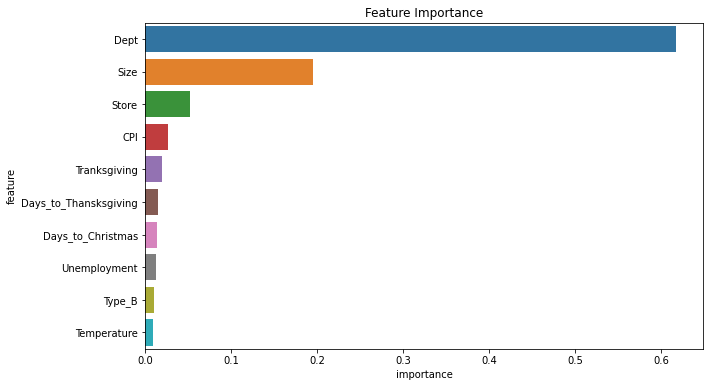

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature')

**XGBoost**

In [ ]:

importance_df=pd.DataFrame({
    'feature':train_inputs.columns,
    'importance':model_4.feature_importances_
}).sort_values('importance',ascending=False)

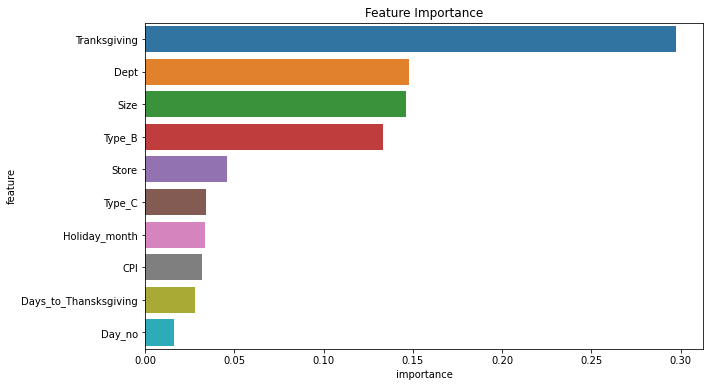

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature')

From the above graphs we can see that:
*   `ThanksGiving`, `Dept`, `Size` have the maxminum importance.
*   `MarkDown1`, `MarkDown2`, `MarkDown3`, `MarkDown4`, `MarkDown5`, `Temperature` have the least importance. 
*  We will drop these columns from the training and validation set and train the model again.

In [ ]:
train_inputs=train_inputs.drop([ 'Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month'], axis=1)
val_inputs=val_inputs.drop([  'Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month' ], axis=1)
test_inputs=test_inputs.drop([  'Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month'], axis=1)

In [ ]:
train_inputs=train_inputs.drop([ 'IsHoliday_y_True','Days_to_Christmas', 'WeekDay_no', 'Christmas'], axis=1)
val_inputs=val_inputs.drop([ 'IsHoliday_y_True','Days_to_Christmas', 'WeekDay_no', 'Christmas'], axis=1)
test_inputs=test_inputs.drop([ 'IsHoliday_y_True','Days_to_Christmas', 'WeekDay_no', 'Christmas'], axis=1)

**RandomForestRegressor**

In [ ]:
model_2=RandomForestRegressor(random_state=42)
model_2.fit(train_inputs,train_target)
evaluate_updated(model_2) 

(456.6,
 1664.22,
 array([25407.3666, 15127.9051,  3477.9243, ...,    49.742 ,  1288.4901,
        12776.0579]),
 array([30311.1973, 86100.6366, 30418.424 , ..., 27170.7383,  3036.2296,
          819.7637]))

**Observation:**

Data predicted from `DecisionTreeRegressor` gives an error of `$` 456 on training data set and `$`1,664.22 on Validation set. Clearly this model is not suitable for predicting the Walmart Weekly Sales.

**XGBoost**

In [ ]:
model_4=XGBRegressor(random_state=42)
model_4.fit(train_inputs,train_target)
evaluate_updated(model_4) 

(2914.65,
 3113.73,
 array([28228.031 , 13127.463 ,  2867.3884, ...,  -773.7668,   962.2575,
        15133.012 ], dtype=float32),
 array([26236.791 , 81027.1   , 22172.324 , ..., 22395.94  ,  1296.3944,
         1550.4441], dtype=float32))

**Observation:**

Data predicted from `XGBoostRegressor` gives an error of `$` 2,914 on training data set and `$`3,113 on Validation set. Clearly this model is not suitable for predicting the Walmart Weekly Sales.

## **HyperParameter Tuning**

We will create a function `test_params` that accepts parameters and returns the WMAE for Training and Validation set.

In [ ]:
def test_params(**params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model=XGBRegressor(n_jobs=-1,random_state=42, **params)
    model.fit(train_inputs,train_target)
    return evaluate_updated(model),model

In [ ]:
def test_params( model,**params):
    """Trains a model with the given parameters and returns training & validation WMAE"""
    model=model(n_jobs=-1,random_state=42, **params)
    model.fit(train_inputs,train_target)
    return evaluate_updated(model),model

 **RandomForestRegressor**

### **n_estimators**

In [ ]:
test_params(RandomForestRegressor,n_estimators=200)

**Note:** `RandomForestRegressor` is taking 3X of time as compared to `XGBoostRegressor`, Hence we will perform HyperParameter tuning on `XGBoostRegressor`

**XGBRegressor**

In [ ]:
test_params(XGBRegressor,n_estimators=200)

((2344.33,
  2695.76,
  array([29700.053 , 13634.145 ,  3753.131 , ...,  1805.4508,  -911.1702,
         12981.613 ], dtype=float32),
  array([28700.283  , 80501.4    , 25375.27   , ...,  3452.442  ,
          8387.458  ,   749.33246], dtype=float32)),
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...))

In [ ]:
params, model=test_params(n_estimators=500)

In [ ]:
def test_param_for_graph(**params):
    model=XGBRegressor(n_jobs=-1,random_state=42,**params)
    model.fit(train_inputs,train_target)
    output=evaluate_updated(model)
    train_wame, val_wmae=output[0],output[1]
    return train_wame, val_wmae

In [ ]:
def test_param_plot(param_name, param_value):
  train_errors, val_errors=[],[]
  for i in param_value:
    params = {param_name: i}
    train_wmae, val_wmae = test_param_for_graph(**params)
    train_errors.append(train_wmae)
    val_errors.append(val_wmae)
  plt.figure(figsize=(16,8))
  plt.title('Overfitting curve: ' + param_name)
  plt.plot(param_value, train_errors, 'b-o')
  plt.plot(param_value, val_errors, 'r-o')
  plt.xlabel(param_name)
  plt.ylabel('WMAE')
  plt.legend(['Training', 'Validation'])
  #return train_errors,val_errors

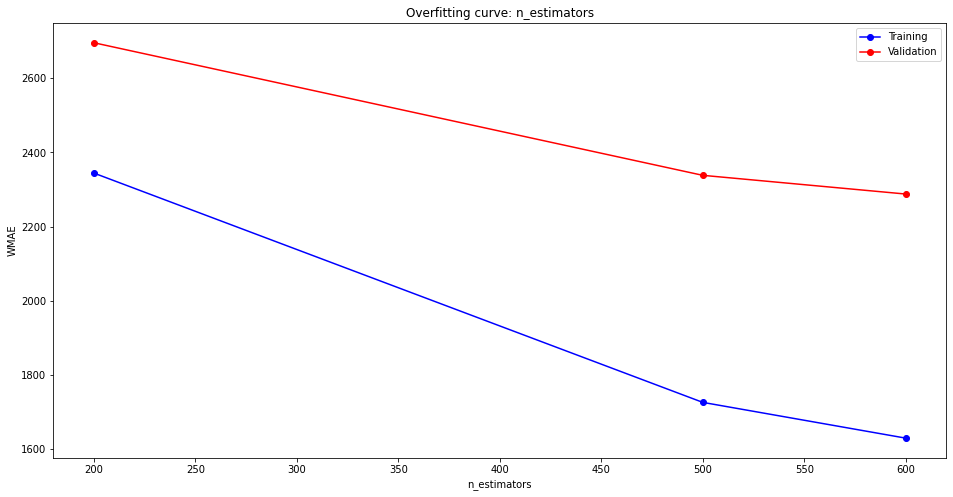

In [ ]:
test_param_plot('n_estimators',[200,500,600])

From the above graph, we can see that the WMAE is minimum for `n_estimator` having values of 500 and 600


estimator:500

### **max_depth**

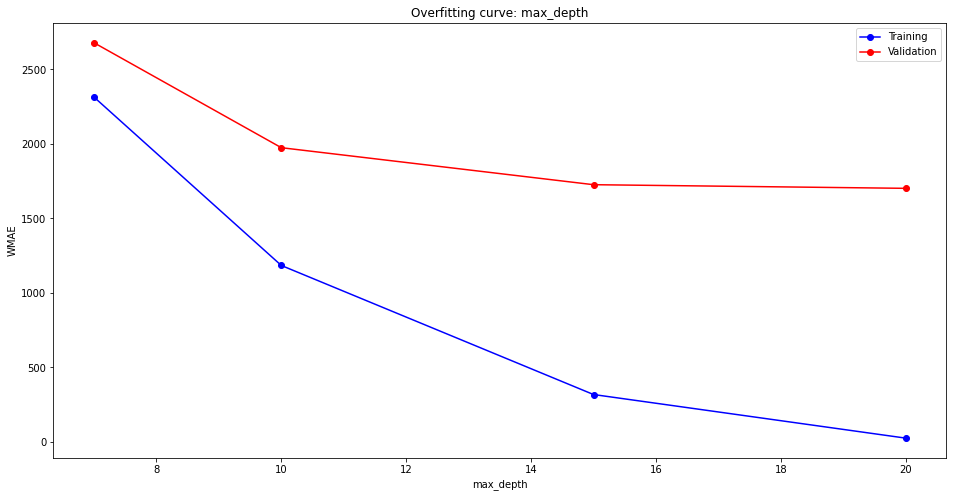

In [ ]:
test_param_plot('max_depth',[7,10,15,20])

* From the above graph, we can see that the WMAE is minimum for `max_depth` from 15 and there is no decrease in the WMAE after 15.
* We will consider `max_depth` = 15

### **Learning Rate**

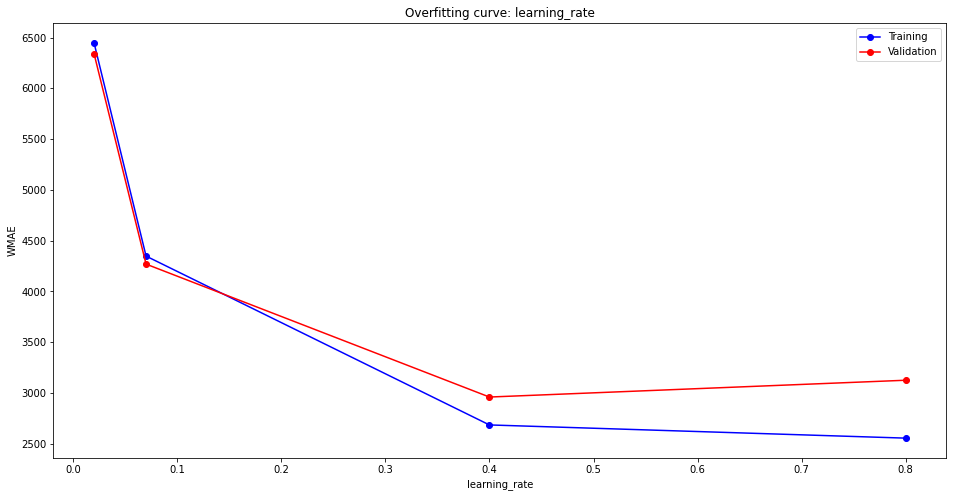

In [ ]:
test_param_plot('learning_rate',[0.02,0.07,0.4,0.8])


From the above graph, we can see that the WMAE is minimum for `learning_rate` at 0.4 and then Over Fitting takes place.

### **gamma**

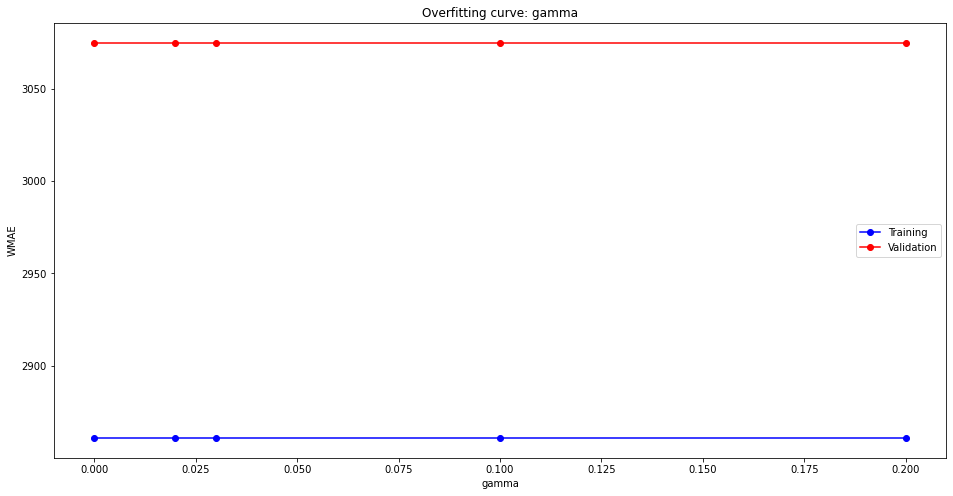

In [ ]:
test_param_plot('gamma',[0,0.02,0.03, 0.1, 0.2])

HyperParameter Tuning of `gamma` makes no difference in the model

## **Training with Tuned Model**

Let's train the model using the above HyperParameters.

In [ ]:
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(n_estimators=500,max_depth=15,learning_rate=0.4)

# Fit the model
gbm.fit(train_inputs, train_target)
evaluate_updated(gbm)



(10.89,
 1800.71,
 array([24924.303 , 15576.086 ,  3190.0457, ...,  1734.6458,    57.142 ,
        11358.323 ], dtype=float32),
 array([ 2.7024867e+04,  8.8596789e+04,  2.9524553e+04, ...,
         4.2476548e+03,  6.7171416e+03, -1.3996407e+01], dtype=float32))

After training the data with various combination of parameters, the below paramters and its values will be used for training the model.

*  'n_estimators'=500
*  `max_depth`=15
*  `learning_rate`=0.07

In [ ]:
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(n_estimators=500,max_depth=15,learning_rate=0.07)

# Fit the model
gbm.fit(train_inputs, train_target)
evaluate_updated(gbm)



(302.06,
 1753.98,
 array([25006.115  ,   683.30414,   625.8088 , ...,  2901.2405 ,
         6883.576  ,  4008.0083 ], dtype=float32),
 array([ 2560.8674 ,  6054.459  ,  1764.8062 , ...,  4844.0195 ,
        10240.254  ,   574.20575], dtype=float32))

Let's save the output in the `.csv` file and check the Kaggle score

In [ ]:
predict_and_submit(gbm, test_inputs,'Final.csv')

,Id,Weekly_Sales
0,1_1_2012-11-02,33414.105469
1,1_1_2012-11-09,19738.005859
2,1_1_2012-11-16,19462.761719
3,1_1_2012-11-23,20875.564453
4,1_1_2012-11-30,19351.708984
...,...,...
115059,45_98_2013-06-28,8.716531
115060,45_98_2013-07-05,353.255066
115061,45_98_2013-07-12,58.098293
115062,45_98_2013-07-19,-76.608330


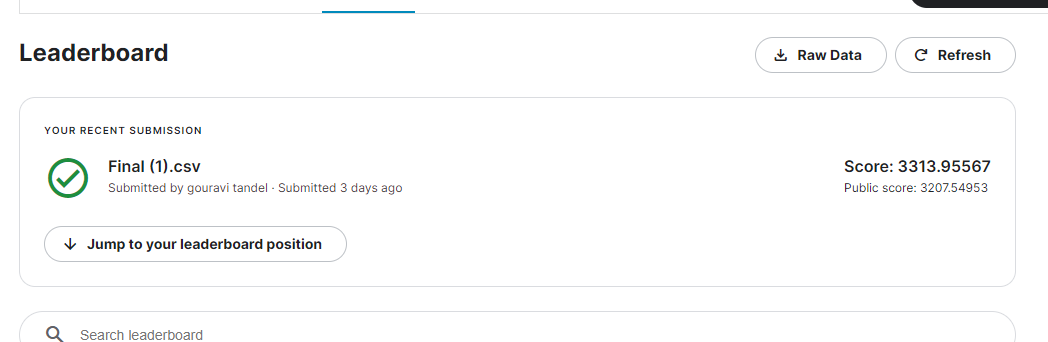

The above generated result gives a WMAE of `$` 3,207 which 
constitutes top 32% of the scoreboard.


## **Summary**

Here’s a brief summary of the process we followed for the Weekly Sales Prediction of Walmart.

1. We have installed the required libraries.
2. We have downloaded the data using `opendatasets` library from Kaggle.
3. We have performed below actions on the Data.
*   View Dataset Files
*   Unzip files
*   Load Training set with Pandas 
*   Load Test set with Pandas
4. We have performed EDA by analysing below columns to get meangingful insights out of it.
*    Date
*    Store
*    Dept
*    Type
5. We have answered below questions to generate insights from the dataset.
*    What is the effect of Markdown on the sales?
*    What are the days with max sales?
6. We have prepared Dataset for Training and Testing
7. We have Trained & Evaluated Hardcoded Model
8. We have Trained & Evaluated Baseline Model
9. Finally we have made Predictions and Submission 
10. To improve the performance we have performed Feature Engineering by performing below acrions:
*   Extracted part of date
*   Created a funtion `is_Holiday` to create column to check if its a Holiday Month (`Holiday_Month`)
*   Created column `Markdown_sum` to create the sum total of all MarkDown columns
*  Created Identifier Columns to Identify if a week is a SuperBowlWeek, LaborDay Week, ThanksGiving Week or Christmas Week
*   Handled null values in `MarkDown1`,`MarkDown2`,`MarkDown3`,`MarkDown4` and `MarkDown5` columns
11. Performed below actions on the data 
*   Scaling
*   Encode Categorical columns
12. We have Save Intermediate Results
13. We have Trains and Evaluate below models
14. We have tuned HyperParamters
15. We have submited the result to Kaggle to get the WMAE of `$` 3,160

Below is the Final Dataset using for training the above dataset which contains the Feature Engineered columns and excludes the columns of least feature importance.

In [ ]:
train_inputs

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Type_B,Type_C,Holiday_month,Days_to_Thansksgiving,Days_to_Christmas,Markdown_sum,LaborDay,Tranksgiving,Christmas,SuperBowlWeek
0,0.000000,0.000000,0.434149,0.050100,0.081742,0.034360,0.010367,0.050137,0.041462,0.840500,...,0.0,0.0,1.0,0.913889,0.913889,0.144556,0.0,0.0,0.0,0.0
87501,0.181818,0.979592,0.392074,0.050100,0.081742,0.034360,0.010367,0.050137,0.041462,0.875680,...,1.0,0.0,1.0,0.913889,0.913889,0.144556,0.0,0.0,0.0,0.0
86424,0.181818,0.857143,0.392074,0.050100,0.081742,0.034360,0.010367,0.050137,0.041462,0.875680,...,1.0,0.0,1.0,0.913889,0.913889,0.144556,0.0,0.0,0.0,0.0
76617,0.159091,0.806122,0.354207,0.050100,0.081742,0.034360,0.010367,0.050137,0.041462,0.873861,...,0.0,0.0,1.0,0.913889,0.913889,0.144556,0.0,0.0,0.0,0.0
84902,0.181818,0.551020,0.392074,0.050100,0.081742,0.034360,0.010367,0.050137,0.041462,0.875680,...,1.0,0.0,1.0,0.913889,0.913889,0.144556,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131319,0.295455,0.234694,0.527299,0.787575,0.059072,0.133659,0.000571,0.014580,0.023096,0.639482,...,0.0,0.0,0.0,0.727778,0.727778,0.138070,0.0,0.0,0.0,0.0
175735,0.386364,0.836735,0.487378,0.778056,0.065407,0.094078,0.000288,0.022112,0.019615,0.116676,...,1.0,0.0,0.0,0.727778,0.727778,0.116218,0.0,0.0,0.0,0.0
304675,0.704545,0.051020,0.529941,0.715932,0.063165,0.059501,0.000387,0.021347,0.040487,0.708884,...,0.0,0.0,0.0,0.727778,0.727778,0.106232,0.0,0.0,0.0,0.0
378613,0.886364,0.744898,0.417906,0.778056,0.041384,0.047665,0.000446,0.019571,0.015552,0.116676,...,0.0,0.0,0.0,0.727778,0.727778,0.068812,0.0,0.0,0.0,0.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337256 entries, 0 to 184674
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  337256 non-null  float64       
 1   Dept                   337256 non-null  float64       
 2   Date                   337256 non-null  datetime64[ns]
 3   IsHoliday_x            337256 non-null  bool          
 4   Temperature            337256 non-null  float64       
 5   Weekly_Sales           337256 non-null  float64       
 6   Fuel_Price             337256 non-null  float64       
 7   MarkDown1              337256 non-null  float64       
 8   MarkDown2              337256 non-null  float64       
 9   MarkDown3              337256 non-null  float64       
 10  MarkDown4              337256 non-null  float64       
 11  MarkDown5              337256 non-null  float64       
 12  CPI                    337256 non-null  floa

## **Future Work**

Here are some ways in which project can we extended:

*  We can perform HyperParamter Tuning on other Parameters such as `min_child_weigh`, `max_delta_step`, `sabsample` etc for `XGBRegressor` Model.
*  We can perform HyperParameter Tuning on the `RandomForestRegressor` Model to achieve better score then `XGBRegressor`.
* We can train the dataset on other models such as KNN, SVM, etc.

## **Reference**

* https://xgboost.readthedocs.io/en/stable/parameter.html
* https://www.geeksforgeeks.org/python-pandas-dataframe/
* https://www.tutorialspoint.com/index.htm


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/gouravitandel1945/ml-project


'https://jovian.ai/gouravitandel1945/ml-project'